In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
outbound = pd.read_csv('../data/clean/LAX_Origin_Flight_Delays_2016.csv')
inbound = pd.read_csv('../data/clean/LAX_Dest_Flight_Delays_2016.csv')

outbound_delays = outbound.loc[outbound['DepDel15'] == 1]
inbound_delays = inbound.loc[inbound['ArrDel15'] == 1]

In [14]:
outbound_cause = outbound_delays[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
outbound_cause = outbound_cause.dropna(axis=0, how='any').reset_index(drop=True)
outbound_cause.head(10)

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,62.0,0.0,0.0,0.0,0.0
1,0.0,0.0,16.0,0.0,0.0
2,17.0,0.0,21.0,0.0,0.0
3,0.0,0.0,0.0,0.0,29.0
4,48.0,0.0,0.0,0.0,0.0
5,288.0,0.0,0.0,0.0,0.0
6,41.0,0.0,0.0,0.0,0.0
7,56.0,0.0,35.0,0.0,0.0
8,48.0,0.0,9.0,0.0,0.0
9,23.0,0.0,0.0,0.0,0.0


In [50]:
outbound_cause_bool = pd.DataFrame()
for col in outbound_cause:
    outbound_cause_bool[col] = (outbound_cause[col] > 0).astype(int)
outbound_cause_bool.head(10)

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,0,0,0,0
1,0,0,1,0,0
2,1,0,1,0,0
3,0,0,0,0,1
4,1,0,0,0,0
5,1,0,0,0,0
6,1,0,0,0,0
7,1,0,1,0,0
8,1,0,1,0,0
9,1,0,0,0,0


In [45]:
inbound_cause = inbound_delays[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
inbound_cause = inbound_cause.dropna(axis=0, how='any').reset_index(drop=True)
inbound_cause.head(10)

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,0.0,0.0,24.0,8.0
1,30.0,0.0,0.0,0.0,6.0
2,1272.0,0.0,11.0,0.0,15.0
3,0.0,0.0,60.0,0.0,0.0
4,8.0,0.0,42.0,0.0,48.0
5,0.0,0.0,0.0,0.0,259.0
6,0.0,0.0,9.0,0.0,7.0
7,0.0,0.0,1.0,0.0,26.0
8,0.0,0.0,25.0,0.0,0.0
9,264.0,0.0,0.0,0.0,0.0


In [73]:
total_delay_minutes = int(inbound_delays['ArrDelay'].sum())
cause_delay_minutes = [round(x) for x in inbound_cause.sum().tolist()]
percent_minutes_delay = [round((x/total_delay_minutes)*100, 2) for x in cause_delay_minutes]
percent_minutes_delay

[28.81, 3.66, 31.26, 0.18, 36.09]

In [49]:
inbound_cause_bool = pd.DataFrame()
for col in inbound_cause:
    inbound_cause_bool[col] = (inbound_cause[col] > 0).astype(int)
inbound_cause_bool.head(10)

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,0,0,1,1
1,1,0,0,0,1
2,1,0,1,0,1
3,0,0,1,0,0
4,1,0,1,0,1
5,0,0,0,0,1
6,0,0,1,0,1
7,0,0,1,0,1
8,0,0,1,0,0
9,1,0,0,0,0


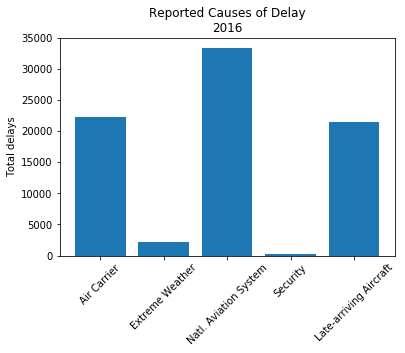

In [59]:
cause = ['Air Carrier','Extreme Weather','Natl. Aviation System','Security','Late-arriving Aircraft']
counts = inbound_cause_bool.sum()
x_axis = np.arange(1,6,1)

plt.bar(x_axis,counts)
plt.title('Reported Causes of Delay\n2016')
plt.xticks(x_axis, cause, rotation=45)
plt.ylabel('Total delays')
plt.show()

2707250.0